In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline 

In [4]:
x_data = np.linspace(0.0,10,1000000)
x_data

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05, ...,
         9.99998000e+00,   9.99999000e+00,   1.00000000e+01])

In [5]:
noise = np.random.rand(len(x_data))
noise

array([ 0.08085882,  0.58177859,  0.17501778, ...,  0.75669042,
        0.26553534,  0.71950162])

y = mx + b


b = 5

In [7]:
y_true = (0.5)*x_data + 5 + noise
y_true

array([  5.08085882,   5.58178359,   5.17502778, ...,  10.75668042,
        10.26553034,  10.71950162])

In [9]:
x_df = pd.DataFrame(x_data,columns=['X Data'])
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [11]:
y_df = pd.DataFrame(y_true,columns=['Y'])
y_df.head()

,Y
0,5.080859
1,5.581784
2,5.175028
3,5.184496
4,5.513528


In [14]:
my_data = pd.concat([x_df,y_df],axis=1)
my_data.head()

,X Data,Y
0,0.00000,5.080859
1,0.00001,5.581784
2,0.00002,5.175028
3,0.00003,5.184496
4,0.00004,5.513528


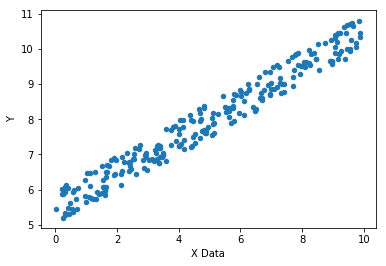

In [18]:
my_data.sample(250).plot(kind = 'scatter', x = 'X Data', y = 'Y')